## 밑바닥부터 시작하는 딥러닝(Deep Learning from Scratch) 챕터별 예제코드 정리 
예제코드가 기본이나 정확히 일치하지는 않습니다. 개인적으로 모든 코드들을 문서화하되 너무 기본적인 내용은 제외하거나 나름대로 더 필요하다고 생각되는 내용은 추가하였습니다. 같은 내용을 다른 방식으로 구현하는 경우도 있습니다.
## Chapter 4. 신경망 학습
### 4.2 Loss function (손실함수)
### mean squared error
회귀문제를 풀 때, 주로 사용하는 손실함수이며 분류문제를 풀 때 물론 사용할 수도 있지만 거의 사용되지 않는다. 아래의 예제는 분류문제로 적절하지는 않지만 예제이므로 간단하게 진행한 것이다. 예제는 label이 one-hot representation으로 주어져있는 경우이다.

In [15]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
## mean squared error example
# loss function = mean squared error
def mean_squared_error(y, t):
    return 0.5 * np.sum((y - t)**2)

# true label (one-hot representation)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # proper probability
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # not proper probability

print(mean_squared_error(np.array(y1), np.array(t))) # Calculate loss
print(mean_squared_error(np.array(y2), np.array(t))) # Calculate loss
print(mean_squared_error(np.array(y1), np.array(t)) < mean_squared_error(np.array(y2), np.array(t)))
# 적절히 True label일 경우의 probability 값을 높게 준 것이 loss가 낮은 것이 당연!

0.0975
0.5975
True


### crosss entropy error
분류문제를 풀 때 사용하는 손실함수, 실제로 forward 과정에서 나온 n차원의 스코어 벡터에 대해서 softmax layer를 씌워 확률로 만들고 그 확률을 과 true label을 기반으로 loss를 계산하는 것이며 실제로 식을 잘 풀어보면 likelihood 최대화와 일맥상통함. 더 자세한 내용은 아래의 cs231n의 course note에서 hinge loss와의 차이를 고민해보면 더 깊게 이해할 수 있다. 예제는 label이 one-hot representation으로 주어져있는 경우이다.  
cs231n : http://cs231n.github.io/linear-classify/

In [16]:
## Cross-entropy error example
# loss function = cross entropy
# true label (one-hot representation)
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0] # proper probability
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0] # not proper probability

def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) #delta = log안에 0 값이 들어가는 것을 막기위함!

print(cross_entropy_error(np.array(y1), np.array(t))) # Calculate loss
print(cross_entropy_error(np.array(y2), np.array(t))) # Calculate loss
# y1의 경우 제대로 범주를 맞추었으므로 loss가 낮음을 확인이 가능하다.

0.510825457099
2.30258409299


### cross entropy error with mini-batch example
batch처리로 다수의 데이터에 대해서 loss를 계산할 때를 대비하여 구현한 example이다. 임의로 example set을 생성하였다.

In [17]:
## Cross-entropy error with mini-batch example
# loss function = cross entropy
# prepare example set
def normal(x):
    return x / np.sum(x) # cross_entropy를 적용하기위해 example의 행별 합이 1이되도록 control
example = np.random.rand(100,10) # 0 ~ 1 균등분포에서 숫자를 뽑아 example array 생성
example = np.apply_along_axis(normal, 1, example)

def maxtoOne(x):
    return (np.max(x) == x) * 1
example_label = np.random.rand(100,10)
example_label = np.apply_along_axis(maxtoOne, 1, example_label)

# cross entropy error with mini-batch
train_size = example.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, 10, replace = False)
x_batch = example[batch_mask]
t_batch = example_label[batch_mask]

# label에 대한 정보가 one hot encoding으로 주어져있을 때
def cross_entropy_error_batch_one_hot(y, t): # 데이터가 하나로 들어올 경우와 데이터가 배치단위로 묶여 입력될 경우를 동시에 처리한다.
    if y.ndim == 1: # array는 n.dim == 2로 하나만 접근할 때 해당 랭크가 깨짐에 주목하여
        t = t.reshape((1,t.size))
        y = y.reshape((1,y.size))

    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

# label에 대한 정보가 one hot encoding으로 주어져있지 않을 때
def cross_entropy_error_batch(y, t): # 데이터가 하나로 들어올 경우와 데이터가 배치단위로 묶여 입력될 경우를 동시에 처리한다.
    if y.ndim == 1:
        t = t.reshape((1,t.size))
        y = y.reshape((1,y.size))

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size
print(cross_entropy_error_batch_one_hot(x_batch, t_batch))
print(cross_entropy_error_batch(example[0], np.where(example_label[0] == 1)[0]))

2.71638923357
1.83715795946


### 4.3 Numerical gradient (수치미분)
### Numerical difference (일변수함수)
실제로는 신경망 같은 알고리즘을 구현할 때는, analytic gradient(해석적 미분)을 활용하지만 Numerical gradient로 내가 analytic gradient(해석적 미분)을 코드로 제대로 구현하였는 지, debugging할 때 활용하면 좋다. analytic gradient(해석적 미분)는 우리가 일반적으로 생각하는 그 미분이다.  
Numerical gradient(수치미분)은 차분을 통해 구현한다. 아래의 예제는 일변수실수함수의 경우를 상정한 것이다.
![Alt text](http://i.imgur.com/2Fj0d5V.png)

In [27]:
## numerical gradient
# numerical gradient : forward difference example (bad)
# f에는 실제로 특정한 함수를 정의해야함
def numerical_diff_forward(f, x):
    h = 10e-5
    return (f(x + h) - f(x)) / h

# numerical gradient : central difference (good)
# f에는 실제로 특정한 함수를 정의해야함
def numerical_diff_central(f, x):
    h = 10e-5
    return (f(x + h) - f(x - h)) / (2*h)

In [29]:
# numerical gradient example
# example 1
def function_1(x):
    return 0.01 * (x**2) + 0.1 * x

x = np.arange(start = 0, stop = 20, step = 0.1)
y = function_1(x)

# 위에서 정의한 전방차분(forward difference)와 중앙차분(central difference)를 이용해 일변수함수의 numerical gradient(1차원)를 계산한다.
numerical_diff_forward(function_1, 5)
numerical_diff_central(function_1, 5)

0.1999999999990898

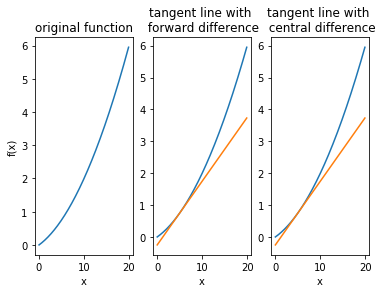

In [30]:
# 전방차분으로 구한 numerical gradient로 접선을 그려보자
def tangent_line(f, x):
    d = numerical_diff_forward(f, x)
    y = f(x) - d * x
    return lambda t : d * t + y # return값으로 함수를 반환, 축약함수(lambda)를 활용하여 간편하게 작성이 가능하다.

fig = plt.figure()
fig.add_subplot(1,3,1)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('original function')

tmp1 = tangent_line(function_1, 5)
y1 = tmp1(x)
fig.add_subplot(1,3,2)
plt.plot(x,y)
plt.plot(x,y1)
plt.xlabel('x')
plt.title('tangent line with \n forward difference')

tmp2 = tangent_line(function_1, 5)
y2 = tmp2(x)
fig.add_subplot(1,3,3)
plt.plot(x,y)
plt.plot(x,y2)
plt.xlabel('x')
plt.title('tangent line with \n central difference')

### partial derivative (편미분)
다변수함수에서 다른 변수들을 특정값으로 고정시켜놓고 한 변수에 대하여 미분

In [21]:
## partial derivative (다변수함수일 경우, 한 변수에 대하여)
# partial derivative example
def function_2(x):
    return x[0] ** 2 + x[1] ** 2

def function_2_better(x): # np로 input ndarry의 ndim까지 고려한 버전
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis = 1)

# example 1. x0 = 3, x1 = 4, af/ ax0
def function_tmp1(x0):
    return x0**2 + 4.0 ** 2.0
numerical_diff_central(function_tmp1, 3)

# example 2. x0 = 3, x1 = 4, af/ ax1
def function_tmp2(x1):
    return 3.0**2 + x1 ** 2.0
numerical_diff_central(function_tmp2, 4)

7.999999999999119

### gradient

In [24]:
## gradient (중앙차분 이용)
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2 * h)
        x[idx] = tmp_val

    return grad
numerical_gradient(function_2_better, np.array([3.0, 4.0]))
numerical_gradient(function_2_better, np.array([0.0, 2.0]))
numerical_gradient(function_2_better, np.array([3.0, 0.0]))

def numerical_gradient_batch(f, x): # numerical_gradient가 하나의 instance에 대해서도 작동하고 batch로도 작동하도롱 변경
    if x.ndim == 1:
        return numerical_gradient(f,x)
    else:
        grad = np.zeros_like(x)

        for idx, x in enumerate(x):
            grad[idx] = numerical_gradient(f, x)

        return grad

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


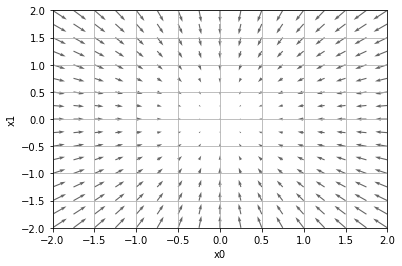

In [32]:
# partial derivative example에서 활용했던 함수의 gradient의 경향을 시각화
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)
X, Y = np.meshgrid(x0, x1)

X = X.flatten()
Y = Y.flatten()

grad = numerical_gradient_batch(function_2_better, np.array([X, Y]))
plt.figure()
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")  # ,headwidth=10,scale=40,color="#444444")
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('x0')
plt.ylabel('x1')
plt.grid()
plt.legend()
plt.draw()
plt.show()